In [85]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D



In [87]:
# Load the dataset
netflix_df = pd.read_csv("netflix_data.csv")



In [89]:
# Basic info and initial exploration
print("Dataset Info:")
print(netflix_df.info())
print("\nFirst 5 rows:")
print(netflix_df.head())
print(netflix_df.tail())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB
None

First 5 rows:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie   

In [91]:
# Filter only movies and required columns
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]


In [93]:
netflix_df.shape

(7787, 11)

In [95]:
netflix_df.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
duration        7787
description     7787
genre           7787
dtype: int64

In [97]:
# Drop rows with missing duration or release_year or genre or country
netflix_df.fillna(0,inplace=True)

In [99]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [168]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,0,Nasty C,0,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,0,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,0,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


In [170]:
# Short movies (< 60 min)
short_movies = netflix_movies[netflix_movies["duration"] < 60]
print("\nShort Movies (< 60 minutes):")
print(short_movies.head(20))



Short Movies (< 60 minutes):
                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220     

In [105]:

# Assign colors based on genre
colors = []
for genre in netflix_movies["genre"]:
    if genre == "Children":
        colors.append("red")
    elif genre == "Documentaries":
        colors.append("blue")
    elif genre == "Stand-Up":
        colors.append("yellow")
    else:
        colors.append("green")



Text(0.5, 1.0, 'Netflix Movie Duration by Release Year')

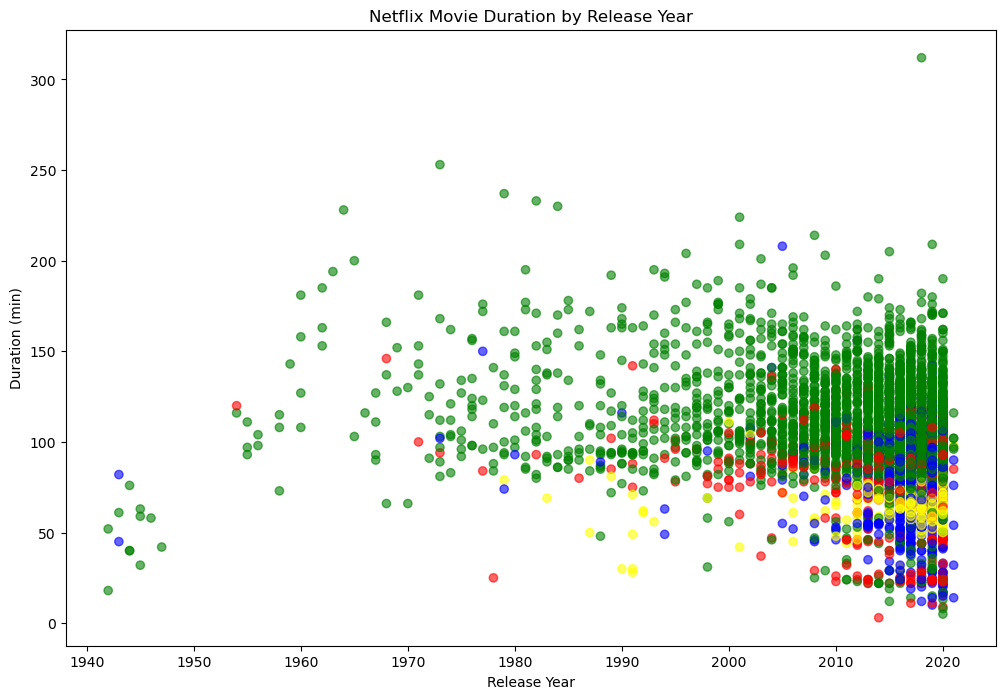

In [144]:
# Scatter plot with trendline and average line
plt.figure(figsize=(12, 8))
plt.scatter(netflix_movies["release_year"], netflix_movies["duration"], c=colors, alpha=0.6)
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.title("Netflix Movie Duration by Release Year")

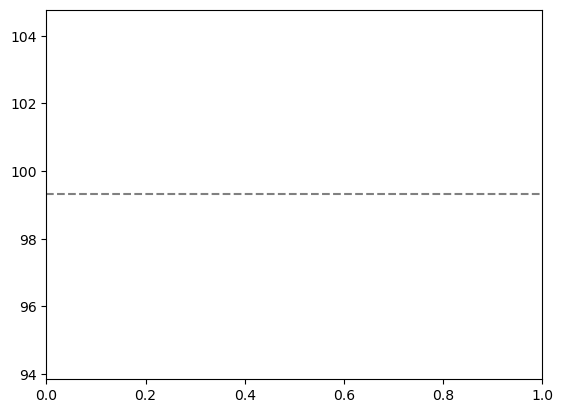

In [109]:
# Add average duration line
avg_duration = netflix_movies["duration"].mean()
plt.axhline(y=avg_duration, color='gray', linestyle='--', label=f'Average Duration ({avg_duration:.0f} min)')



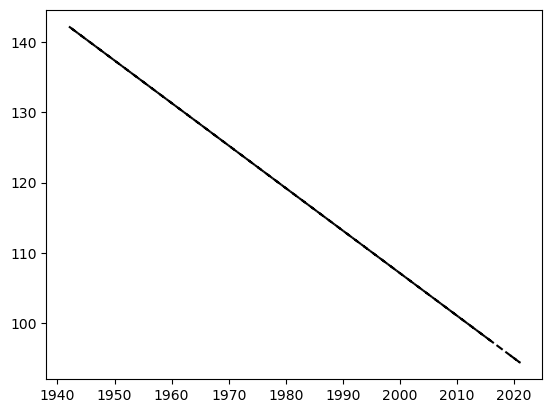

In [111]:
# Add trendline
z = np.polyfit(netflix_movies['release_year'], netflix_movies['duration'], 1)
p = np.poly1d(z)
plt.plot(netflix_movies["release_year"], p(netflix_movies["release_year"]), "black", linestyle="--", label="Trendline")



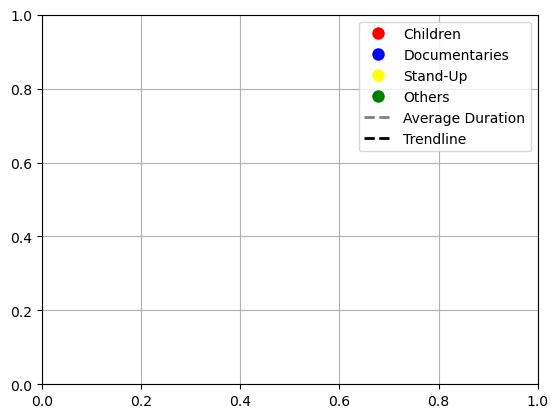

In [166]:
# Custom legend
legend_elements = [
    Line2D([16], [16], marker='o', color='w', label='Children', markerfacecolor='red', markersize=10),
    Line2D([16], [16], marker='o', color='w', label='Documentaries', markerfacecolor='blue', markersize=10),
    Line2D([16], [16], marker='o', color='w', label='Stand-Up', markerfacecolor='yellow', markersize=10),
    Line2D([16], [16], marker='o', color='w', label='Others', markerfacecolor='green', markersize=10),
    Line2D([16], [16], color='gray', lw=2, linestyle='--', label='Average Duration'),
    Line2D([16], [16], color='black', lw=2, linestyle='--', label='Trendline')
]
plt.legend(handles=legend_elements)

plt.grid(True)
plt.show()



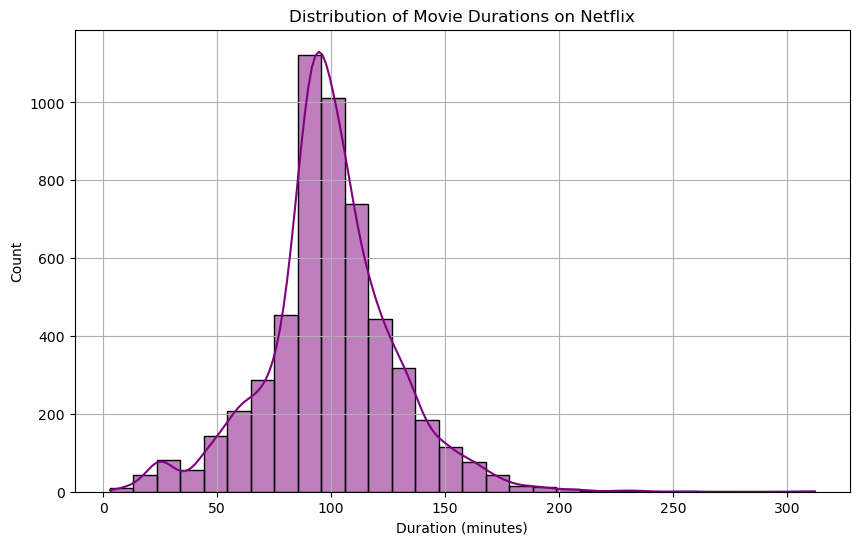

In [115]:
# Histogram of durations
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies["duration"], bins=30, kde=True, color="purple")
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()



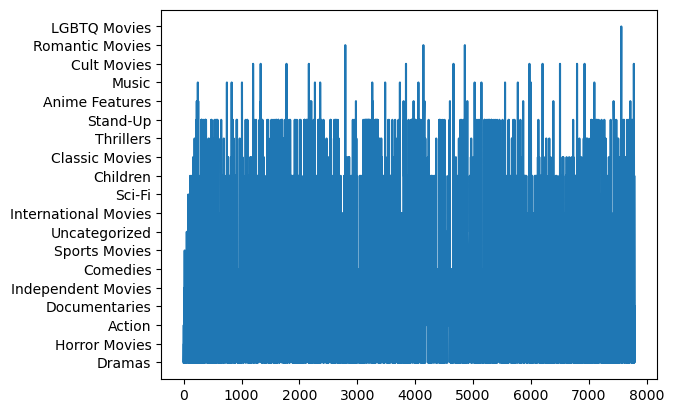

In [126]:
plt.plot(netflix_movies.index,netflix_movies["genre"])

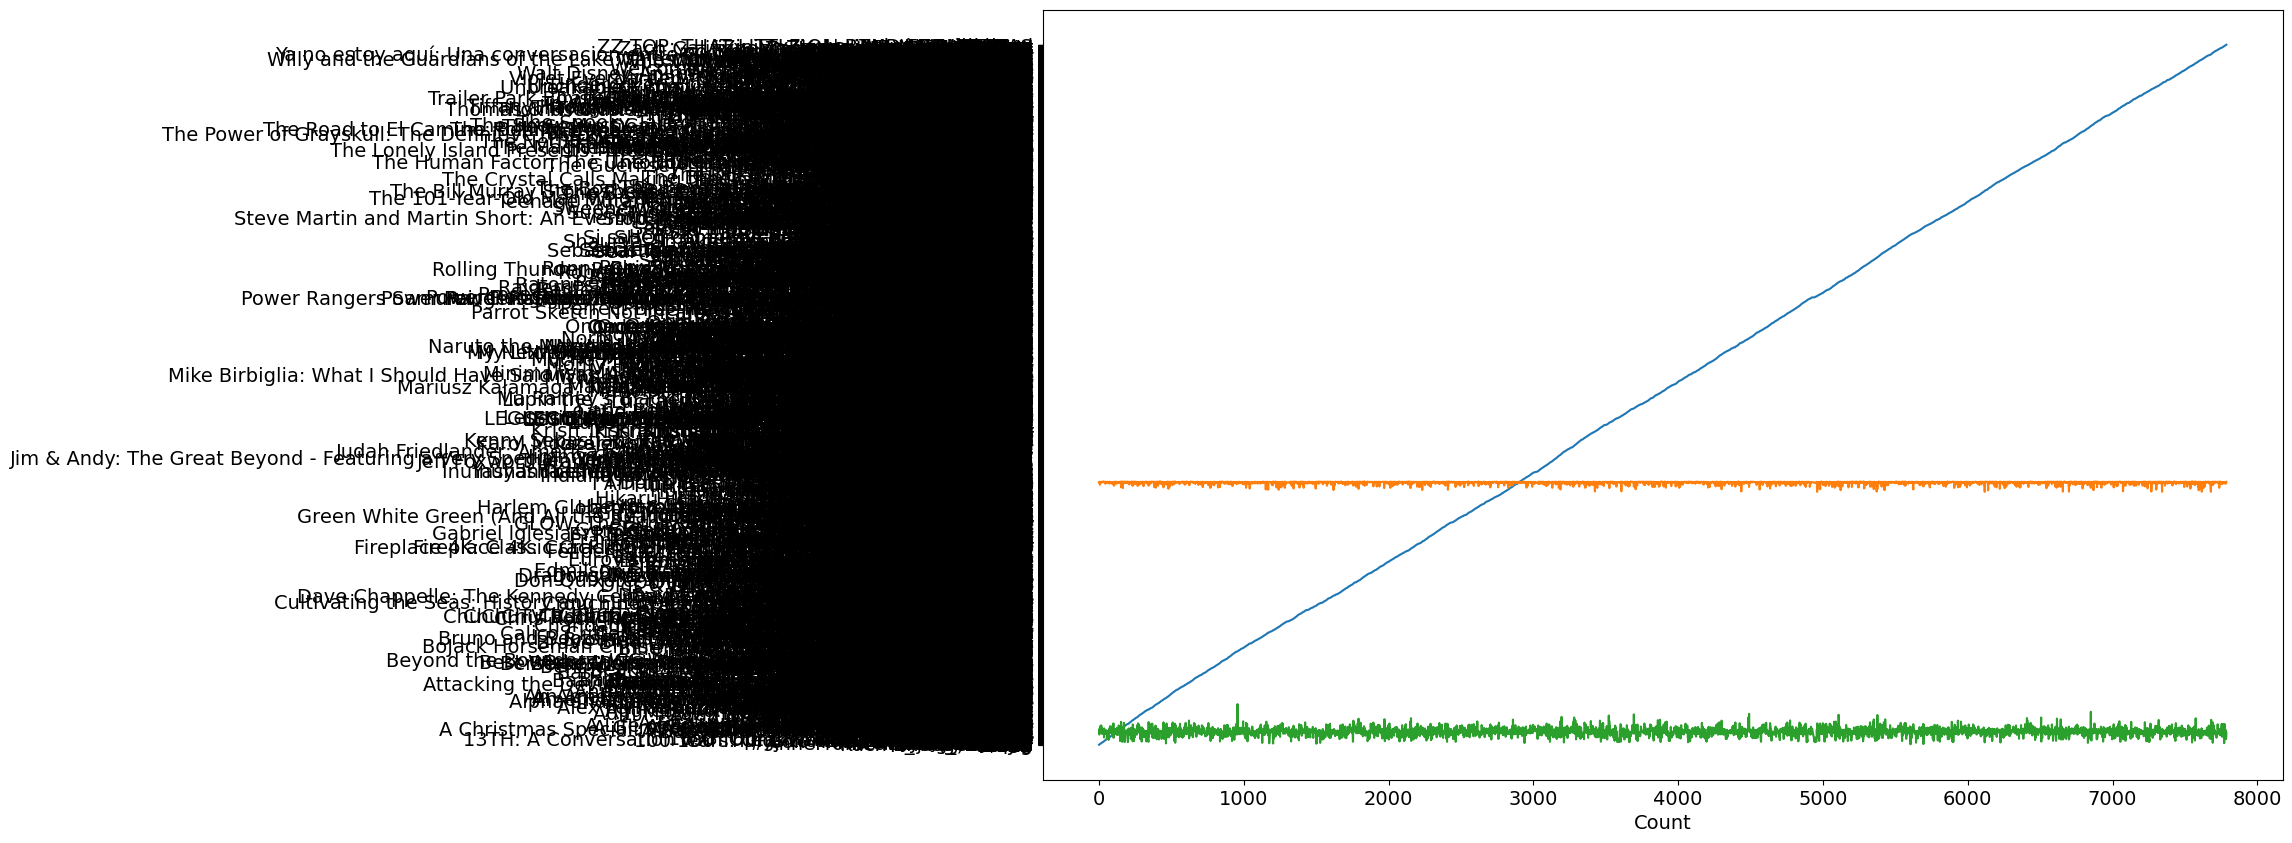

In [137]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Duration (minutes)",fontsize=14)
plt.xlabel("Count",fontsize=14)
plt.plot(netflix_movies.index,netflix_movies["title"])
plt.plot(netflix_movies.index,netflix_movies["release_year"])
plt.plot(netflix_movies.index,netflix_movies["duration"])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5612\3044948432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


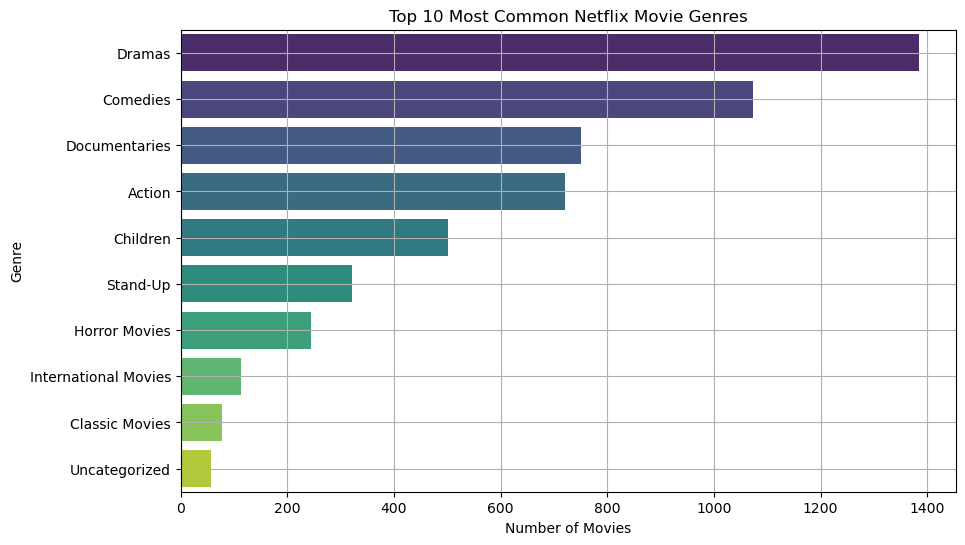

In [146]:
# Bar plot: Top 10 Genres
plt.figure(figsize=(10, 6))
top_genres = netflix_movies["genre"].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Most Common Netflix Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.grid(True)
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_5612\3105585346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


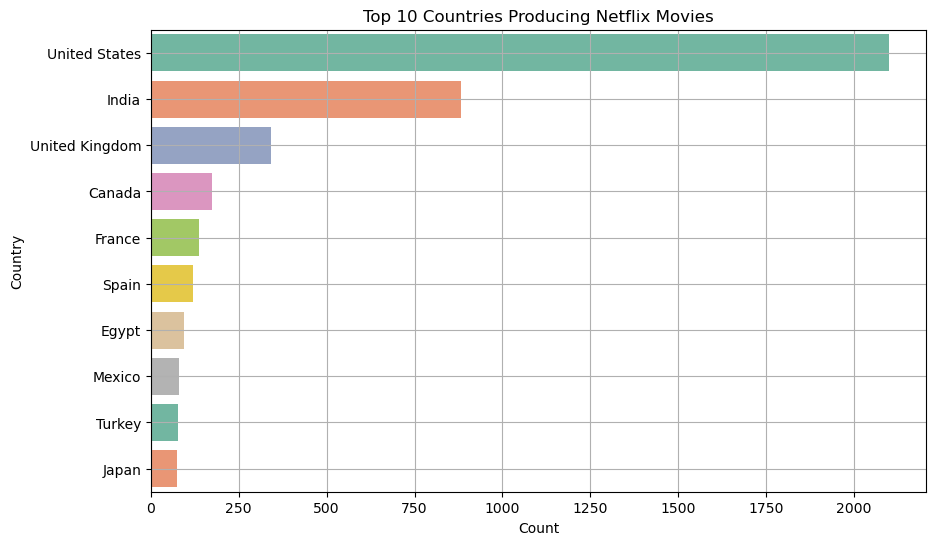

In [148]:
# Bar plot: Top 10 Countries
plt.figure(figsize=(10, 6))
top_countries = netflix_movies["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title("Top 10 Countries Producing Netflix Movies")
plt.xlabel("Count")
plt.ylabel("Country")
plt.grid(True)
plt.show()